<a href="https://colab.research.google.com/github/LeonardoJYNoh/ProjetoGT/blob/main/ProjetoGT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESAFIO

Seu desafio é utilizar esses dados para fornecer insights importantes que ajudem a empresa a:

**1- Compreender o perfil dos clientes: Quais são os segmentos de clientes mais frequentes (Corporate, Consumer) e quais produtos eles compram mais?**

**2- Avaliar o desempenho das vendas: Quais produtos ou categorias de produtos são mais lucrativos? Há alguma variação de lucro por região ou por modo de pagamento?**

**3- Analisar a eficácia das entregas e pagamentos: A forma de entrega ou o método de pagamento afeta o lucro ou o número de devoluções?**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/vendas_supermercado.csv")
display(df.head()) #so usei o head para ficar menos poluido, e ter uma noção dos valores
#matriz 5902x21

,Unnamed: 0,CODIGO_PEDIDO,DATA_PEDIDO,DATA_ENTREGA,FORMA_ENTREGA,CODIGO_CLIENTE,NOME_CLIENTE,SEGMENTO_CLIENTE,PAIS,CIDADE,...,REGIAO,CODIGO_PRODUTO,CATEGORIA_PRODUTO,SUB_CATEGORIA_PRODUTO,NOME_PRODUTO,VALOR_PRODUTO,QUANTIDADE,LUCRO,DEVOLUCAO,MODO_PAGAMENTO
0,0,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1.0,28.2668,No,Online
1,1,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3.0,38.2668,No,Online
2,2,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2.0,67.2742,No,Cards
3,3,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2.0,28.6150,No,Online
4,4,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2.0,-5.2640,No,Online




---


# Sumário

entender todas as colunas dessa matriz

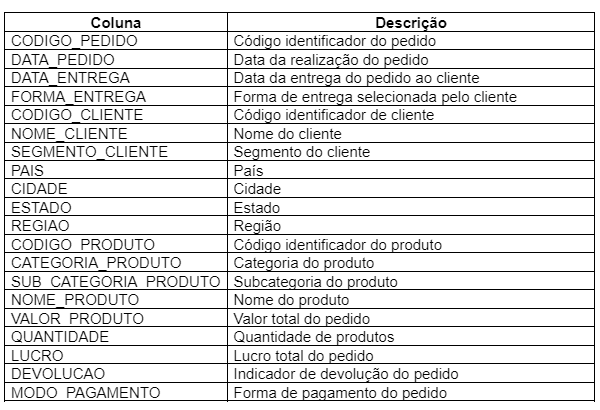



In [ ]:
df.describe()
#compreeender os valores que estamos trabalhando

,Unnamed: 0,VALOR_PRODUTO,QUANTIDADE,LUCRO
count,5901.000000,5801.000000,5801.000000,5801.000000
mean,2950.000000,266.250221,3.780210,28.562372
std,1703.616301,472.771269,2.206056,259.330427
min,0.000000,0.836000,1.000000,-6599.978000
25%,1475.000000,72.294000,2.000000,1.552200
50%,2950.000000,128.930000,3.000000,8.278200
75%,4425.000000,268.704000,5.000000,28.171800
max,5900.000000,9099.930000,14.000000,8399.976000




---


# **Compreender o perfil dos clientes**: Quais são os segmentos de clientes mais frequentes (Corporate, Consumer) e quais produtos eles compram mais?

In [ ]:
dfsegmento_quantidade = df['SEGMENTO_CLIENTE'].value_counts().reset_index()
dfsegmento_quantidade.columns = ['SEGMENTO_CLIENTE', 'Quantidade']
dfsegmento_quantidade.style.background_gradient(cmap='Blues', high=0.8, low =0.5, subset=['Quantidade'])
#contar o numero total de segmentos dos clientes.
#ajuda a ter uma noção.

,SEGMENTO_CLIENTE,Quantidade
0,Consumer,2948
1,Corporate,1745
2,Home Office,1108


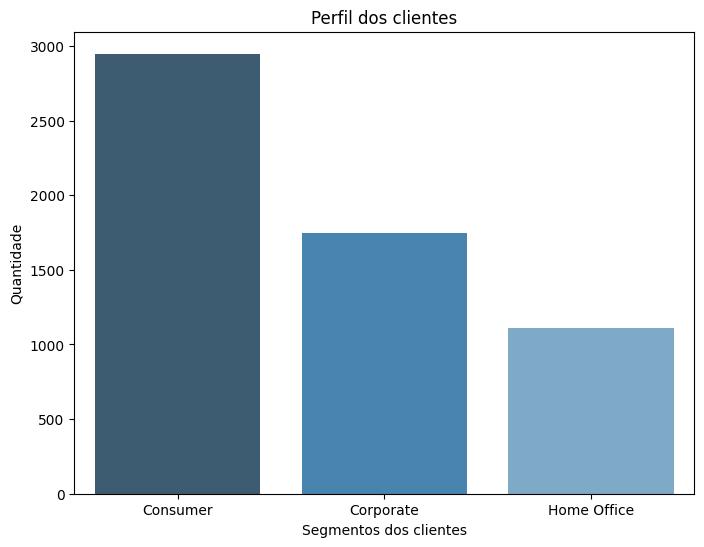

In [ ]:
plt.figure(figsize=(8, 6))
ordenarcliente = df['SEGMENTO_CLIENTE'].value_counts().index #ordenar para conseguir deixa na mesma ordem do grafico abaixo
sns.countplot(data=df, x='SEGMENTO_CLIENTE', order=ordenarcliente, palette='Blues_r_d')
plt.title("Perfil dos clientes")
plt.xlabel("Segmentos dos clientes")
plt.ylabel("Quantidade")
plt.show()
#um grafico para um melhor entendimento.

In [ ]:
corporate = (df['SEGMENTO_CLIENTE'] == "Corporate").sum()
consumer = (df['SEGMENTO_CLIENTE'] == "Consumer").sum()
hoffice = (df['SEGMENTO_CLIENTE'] == "Home Office").sum()
tot = df['SEGMENTO_CLIENTE'].value_counts().sum()

porc_corporate = corporate/tot*100
porc_consumer =  consumer/tot*100
porc_hoffice = hoffice/tot*100
print('A porcentagem de Corporative é {:.2f}%, Consumer é {:.2f}% e de Home Office é {:.2f}%'.format(porc_corporate, porc_consumer, porc_hoffice))

A porcentagem de Corporative é 30.08%, Consumer é 50.82% e de Home Office é 19.10%


**Conseguimos perceber que a maioria do clientes são "Consumer"**



*   Consumer = 50,8%
* Corporate = 30,1%
*Home office = 19,1%


In [ ]:
consumerdf = df[df['SEGMENTO_CLIENTE'] == 'Consumer']
corporatedf = df[df['SEGMENTO_CLIENTE'] == 'Corporate']
#filtrar as matrizes



---


# Entender os clientes corporativos

In [ ]:
dfcorporate_quantidade = corporatedf['CATEGORIA_PRODUTO'].value_counts().reset_index()
dfcorporate_quantidade.columns = ['CATEGORIA_PRODUTO','Quantidade']
dfcorporate_quantidade.style.background_gradient(cmap='Greens', high=0.2, low=0.6, subset=['Quantidade'])

,CATEGORIA_PRODUTO,Quantidade
0,Office Supplies,1039
1,Furniture,382
2,Technology,324


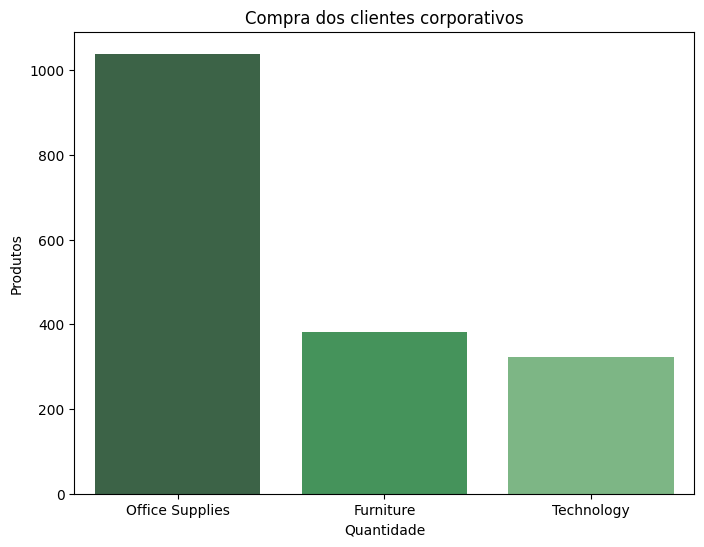

In [ ]:
#tentei colocar em ordem crescente
plt.figure(figsize=(8, 6))
ordenarcateg = corporatedf['CATEGORIA_PRODUTO'].value_counts().index
verde = sns.color_palette("Greens_r_d", n_colors=3)
sns.countplot(data = corporatedf, x= 'CATEGORIA_PRODUTO',order = ordenarcateg, palette=verde) #ordenado de acordo com quantidade de forma crescente
plt.title("Compra dos clientes corporativos") #titulo, parametros
plt.xlabel("Quantidade")
plt.ylabel("Produtos")
plt.show()

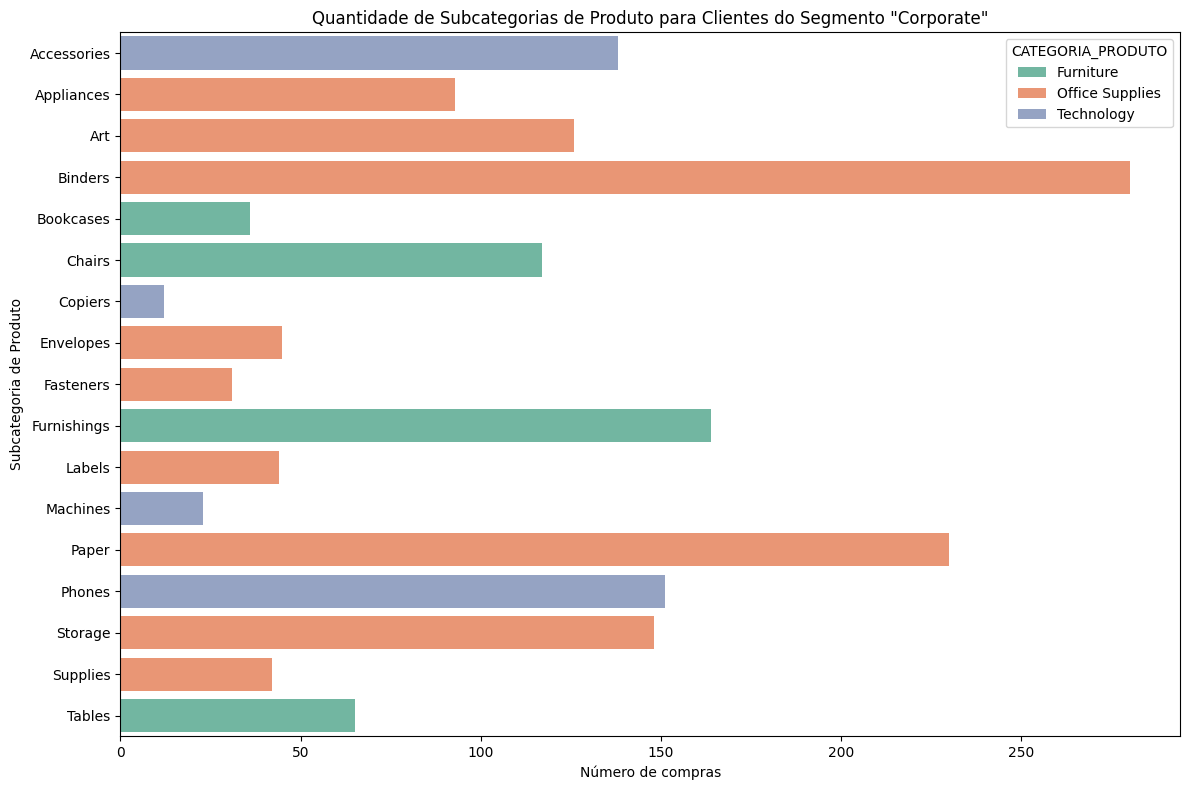

In [ ]:
plt.figure(figsize=(12, 8))
ordenarsub = sorted(corporatedf['SUB_CATEGORIA_PRODUTO'].unique()) #ordenar em ordem alfabetica
categorias = sorted(corporatedf['CATEGORIA_PRODUTO'].unique()) #ordenar as categorias de produtos
#ordenei as categorias para manter o padrão de cor e ordenei as subcategorias para uma melhor vizualização
sns.countplot(data=corporatedf, y='SUB_CATEGORIA_PRODUTO', hue='CATEGORIA_PRODUTO', order=ordenarsub, hue_order=categorias ,palette='Set2') #hue adiciona uma dimensão extra
plt.title('Quantidade de Subcategorias de Produto para Clientes do Segmento "Corporate"')
plt.xlabel('Número de compras')
plt.ylabel('Subcategoria de Produto')
plt.tight_layout()

In [ ]:
ofc_sup = (corporatedf['CATEGORIA_PRODUTO'] == "Office Supplies").sum() #somar todos os componentes para descobrir a porcentagem que estmos mexendo
fur = (corporatedf['CATEGORIA_PRODUTO'] == "Furniture").sum()
tec = (corporatedf['CATEGORIA_PRODUTO'] == "Technology").sum()
tot = corporatedf['CATEGORIA_PRODUTO'].value_counts().sum()

por_ofc_sup = ofc_sup/tot*100 #porcentagem
por_fur = fur/tot*100
por_tec = tec/tot*100

print('A porcentagem de material de escritório é {:.2f}%, mobília é {:.2f}% e de tecnológia é {:.2f}%'.format(por_ofc_sup,por_fur,por_tec))

A porcentagem de material de escritório é 59.54%, mobília é 21.89% e de tecnológia é 18.57%




---


# Entender os clientes consumidores

In [ ]:
dfconsumer_quantidade = consumerdf['CATEGORIA_PRODUTO'].value_counts().reset_index()
dfconsumer_quantidade.columns = ['CATEGORIA_PRODUTO','Quantidade']
dfconsumer_quantidade.style.background_gradient(cmap='Oranges', high=0.3, low=0.6, subset=['Quantidade'])

,CATEGORIA_PRODUTO,Quantidade
0,Office Supplies,1804
1,Furniture,636
2,Technology,508


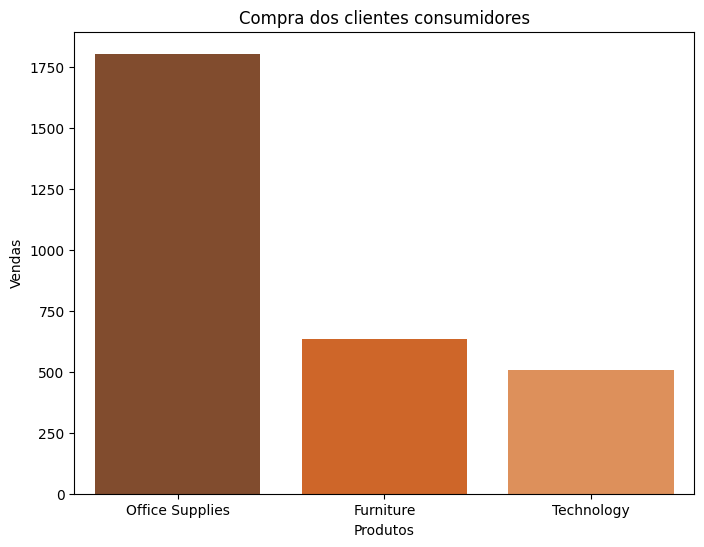

In [ ]:
plt.figure(figsize=(8, 6))
laranja = sns.color_palette("Oranges_r_d", n_colors=3)
sns.countplot(data=consumerdf, x='CATEGORIA_PRODUTO', palette=laranja)
plt.title("Compra dos clientes consumidores")
plt.xlabel("Produtos")
plt.ylabel("Vendas")
plt.show()

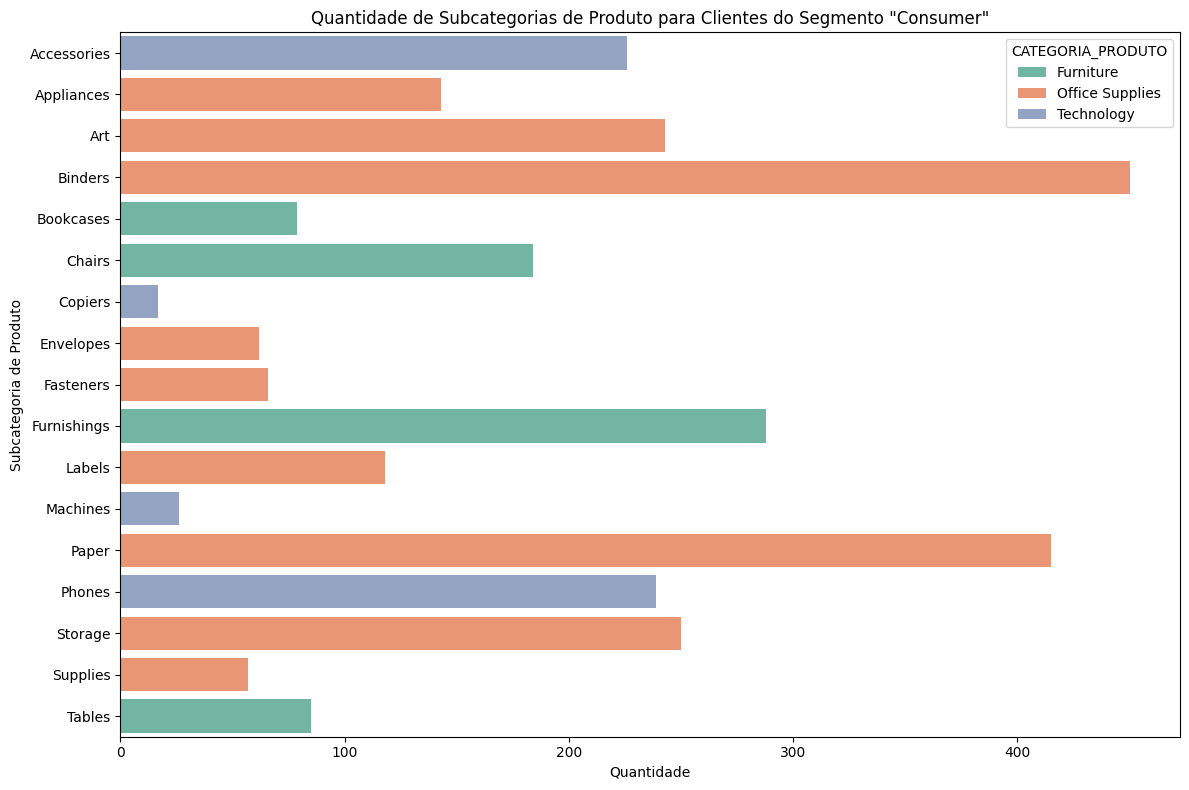

In [ ]:
plt.figure(figsize=(12, 8))
ordenarcons = sorted(consumerdf['SUB_CATEGORIA_PRODUTO'].unique()) #ordenar em ordem alfabetica
categoriascons = sorted(consumerdf['CATEGORIA_PRODUTO'].unique()) #ordenar as categorias de produtos
sns.countplot(data=consumerdf, y='SUB_CATEGORIA_PRODUTO', hue='CATEGORIA_PRODUTO', order=ordenarcons, hue_order=categoriascons, palette='Set2') #hue adiciona uma dimensão extra
plt.title('Quantidade de Subcategorias de Produto para Clientes do Segmento "Consumer"')
plt.xlabel('Quantidade')
plt.ylabel('Subcategoria de Produto')
plt.tight_layout()

In [ ]:
ofc_sup = (consumerdf['CATEGORIA_PRODUTO'] == "Office Supplies").sum()
fur = (consumerdf['CATEGORIA_PRODUTO'] == "Furniture").sum()
tec = (consumerdf['CATEGORIA_PRODUTO'] == "Technology").sum()
tot = consumerdf['CATEGORIA_PRODUTO'].value_counts().sum()

por_ofc_sup = ofc_sup/tot*100
por_fur = fur/tot*100
por_tec = tec/tot*100

print('A porcentagem de material de escritório é {:.2f}%, mobília é {:.2f}% e de tecnológia é {:.2f}%'.format(por_ofc_sup,por_fur,por_tec))

A porcentagem de material de escritório é 61.19%, mobília é 21.57% e de tecnológia é 17.23%




---


# ANALISE DOS CLIENTES


**Porcentagem de produtos comprados pelos consumidores**
*   Material de escritório = 61,2%
*   Mobília = 21,6%
*   Tecnologia = 17,2%

**Porcentagem de produtos comprados pelos corporativos**
*   Material de escritório = 59,5%
*   Mobília = 21,9%
*   Tecnologia = 18,6%


**Percebemos pelos graficos que a compra dos produtos são semelhantes entre os consumidores e corporativos**

**Entretanto os consumidores são quase o dobro dos clientes corporativos**


---


---


# **Avaliar o desempenho das vendas**: Quais produtos ou categorias de produtos são mais lucrativos? Há alguma variação de lucro por região ou por modo de pagamento?




---
# **Valores absolutos de lucro**


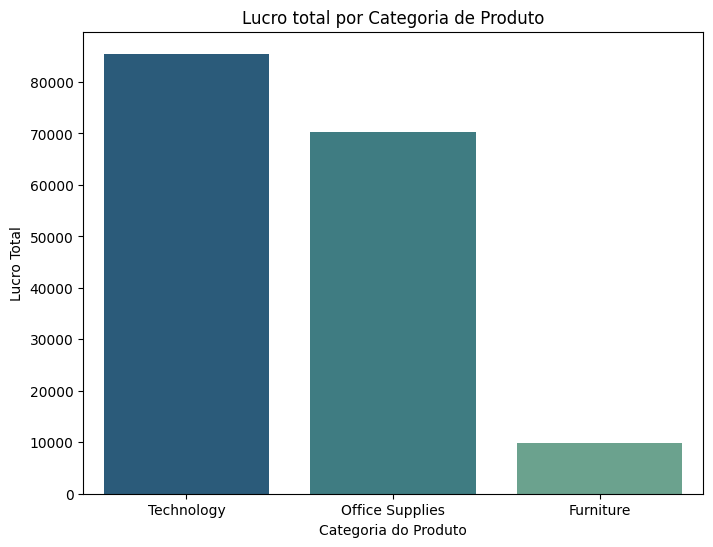

In [ ]:
plt.figure(figsize=(8, 6))
lucro_tot_categ = df.groupby('CATEGORIA_PRODUTO')['LUCRO'].sum().sort_values(ascending=False) #soma total do lucro por categoria de produto
sns.barplot(data = lucro_tot_categ, palette ="crest_r")
plt.title('Lucro total por Categoria de Produto')
plt.xlabel('Categoria do Produto')
plt.ylabel('Lucro Total')
plt.show()

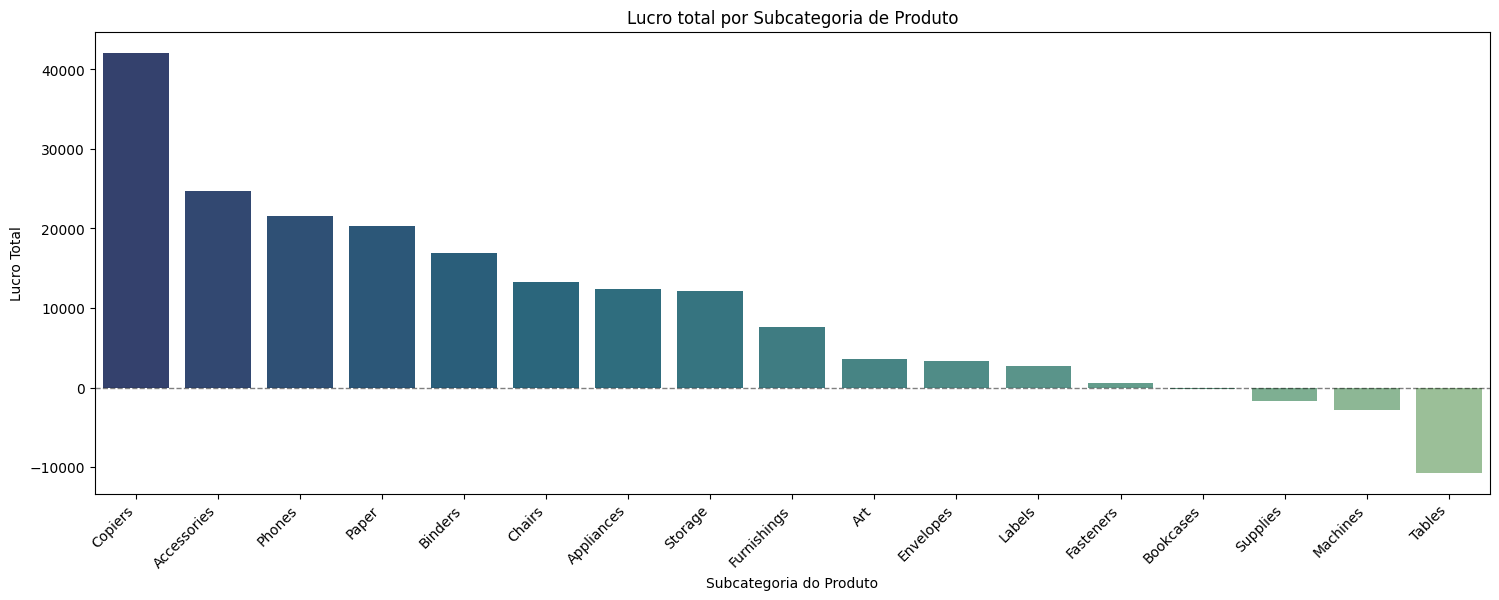

In [ ]:
plt.figure(figsize=(18, 6))
lucro_tot_sub = df.groupby('SUB_CATEGORIA_PRODUTO')['LUCRO'].sum().sort_values(ascending=False) #soma total do lucro por subcategoria de produto
sns.barplot(data = lucro_tot_sub, palette='crest_r') #deu erro na hora de fazer o hue = 'CATEGORIA_PRODUTO'
plt.xticks(rotation=45, horizontalalignment = 'right')
plt.title('Lucro total por Subcategoria de Produto')
plt.xlabel('Subcategoria do Produto')
plt.ylabel('Lucro Total')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.5)
plt.show()


# **Boxplot dos lucros por categoria de produtos**

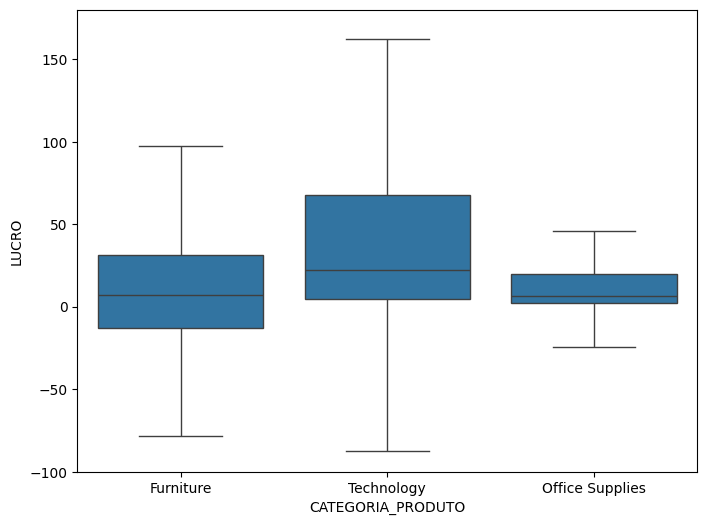

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, y = 'LUCRO', x ='CATEGORIA_PRODUTO', showfliers=False) #removi os outliers devido a grande quantidade deles
plt.ylim(-100, 180) #limitei o espaço para uma melhor vizualisação
plt.show()

# **Valores de Q1, Q3, Média e Mediana das vendas (categorias e subcategorias)**

In [ ]:
for i in ['Office Supplies','Furniture','Technology']:
  dados = df[df['CATEGORIA_PRODUTO'] == i]['LUCRO']
  q1 = dados.quantile(0.25)
  q3 = dados.quantile(0.75)
  media = df[df['CATEGORIA_PRODUTO'] == i]['LUCRO'].mean()
  print('{}: Q1 = {:.2f}, Q3 = {:.2f}, média = {:.2f}'.format(i,q1,q3,media))

print('-='*50)

for i in df['SUB_CATEGORIA_PRODUTO'].unique(): #todos os parametros de subcategorias de produtos
  dados = df[df['SUB_CATEGORIA_PRODUTO'] == i]['LUCRO']
  q1 = dados.quantile(0.25)
  q3 = dados.quantile(0.75)
  media = df[df['SUB_CATEGORIA_PRODUTO'] == i]['LUCRO'].mean()
  mediana = df[df['SUB_CATEGORIA_PRODUTO'] == i]['LUCRO'].median()
  print('{}: Q1 = {:.2f}, Q3 = {:.2f}, média = {:.2f} mediana = {:.2f}'.format(i,q1,q3,media,mediana))

Office Supplies: Q1 = 1.99, Q3 = 19.63, média = 20.03
Furniture: Q1 = -12.85, Q3 = 31.58, média = 8.00
Technology: Q1 = 4.80, Q3 = 67.74, média = 80.97
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Bookcases: Q1 = -30.17, Q3 = 39.62, média = -1.58 mediana = 6.55
Phones: Q1 = 3.95, Q3 = 54.72, média = 42.82 mediana = 19.75
Storage: Q1 = 0.67, Q3 = 26.07, média = 24.84 mediana = 7.50
Accessories: Q1 = 6.03, Q3 = 56.82, média = 54.81 mediana = 20.23
Tables: Q1 = -125.81, Q3 = 26.93, média = -57.47 mediana = -34.52
Binders: Q1 = -6.24, Q3 = 15.55, média = 18.84 mediana = 3.96
Copiers: Q1 = 110.99, Q3 = 992.23, média = 1107.96 mediana = 449.99
Art: Q1 = 1.71, Q3 = 8.09, média = 7.67 mediana = 3.68
Furnishings: Q1 = 2.74, Q3 = 21.75, média = 13.37 mediana = 8.64
Paper: Q1 = 5.84, Q3 = 26.61, média = 25.04 mediana = 11.33
Envelopes: Q1 = 6.06, Q3 = 29.47, média = 25.48 mediana = 12.90
nan: Q1 = nan, Q3 = nan, média = nan mediana = nan
Cha

In [ ]:
media_lucro_cat = df.groupby('CATEGORIA_PRODUTO')['LUCRO'].mean().sort_values(ascending=False)
mediana_lucro_cat = df.groupby('CATEGORIA_PRODUTO')['LUCRO'].median().sort_values(ascending=False)
media_lucro_sub = df.groupby('SUB_CATEGORIA_PRODUTO')['LUCRO'].mean().sort_values(ascending=False)
mediana_lucro_sub = df.groupby('SUB_CATEGORIA_PRODUTO')['LUCRO'].median().sort_values(ascending=False)

#so para ter uma noção de media e mediana dos lucros em numeros
print('Média de lucro por categoria')
print(media_lucro_cat)
print('=-'*30)
print('MEDIANA de lucro por categoria')
print(mediana_lucro_cat)
print('=-'*30)
print('MÉDIA de lucro por subcategoria')
print(media_lucro_sub)
print('=-'*30)
print('MEDIANA de lucro por subcategoria')
print(mediana_lucro_sub)


Média de lucro por categoria
CATEGORIA_PRODUTO
Technology         80.965351
Office Supplies    20.027824
Furniture           8.000987
Name: LUCRO, dtype: float64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
MEDIANA de lucro por categoria
CATEGORIA_PRODUTO
Technology         21.99765
Furniture           7.31835
Office Supplies     6.65880
Name: LUCRO, dtype: float64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
MÉDIA de lucro por subcategoria
SUB_CATEGORIA_PRODUTO
Copiers        1107.963000
Accessories      54.807887
Appliances       45.520499
Phones           42.822789
Chairs           37.545008
Envelopes        25.481314
Paper            25.038790
Storage          24.841180
Binders          18.844496
Labels           13.388667
Furnishings      13.369505
Art               7.674971
Fasteners         4.618323
Bookcases        -1.584332
Supplies        -14.262016
Machines        -44.709431
Tables          -57.466920
Name: LUCRO, dtype: float64
=-=-=-=-=-=-=-



---


# **AZUL = MÉDIA**
# **LARANJA = MEDIANA**

In [ ]:
df['LUCRO_POR_UNIDADE'] = df['LUCRO'] / df['QUANTIDADE']

media_lucro_unidade_cat = df.groupby('CATEGORIA_PRODUTO')['LUCRO_POR_UNIDADE'].mean().sort_values(ascending=False)
mediana_lucro_unidade_cat = df.groupby('CATEGORIA_PRODUTO')['LUCRO_POR_UNIDADE'].median().sort_values(ascending=False)
media_lucro_unidade_sub = df.groupby('SUB_CATEGORIA_PRODUTO')['LUCRO_POR_UNIDADE'].mean().sort_values(ascending=False)
mediana_lucro_unidade_sub = df.groupby('SUB_CATEGORIA_PRODUTO')['LUCRO_POR_UNIDADE'].median().sort_values(ascending=False)

print('Média unitária de lucro por categoria')
print(media_lucro_unidade_cat)
print('=-'*30)
print('MEDIANA unitária de lucro por categoria')
print(mediana_lucro_unidade_cat)
print('=-'*30)
print('MÉDIA unitária de lucro por subcategoria')
print(media_lucro_unidade_sub)
print('=-'*30)
print('MEDIANA unitária de lucro por subcategoria')
print(mediana_lucro_unidade_sub)

Média unitária de lucro por categoria
CATEGORIA_PRODUTO
Technology         20.514489
Office Supplies     5.497689
Furniture           1.930430
Name: LUCRO_POR_UNIDADE, dtype: float64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
MEDIANA unitária de lucro por categoria
CATEGORIA_PRODUTO
Technology         6.99895
Furniture          2.26680
Office Supplies    2.16840
Name: LUCRO_POR_UNIDADE, dtype: float64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
MÉDIA unitária de lucro por subcategoria
SUB_CATEGORIA_PRODUTO
Copiers        271.207929
Accessories     14.028913
Phones          11.872243
Appliances      10.149021
Chairs           9.854441
Envelopes        7.565083
Paper            6.945627
Binders          6.270567
Storage          6.228622
Furnishings      3.442941
Labels           3.184811
Art              1.978003
Fasteners        0.984657
Bookcases       -0.206732
Supplies        -3.904258
Machines       -14.709041
Tables         -16.154797
Name: LUCRO

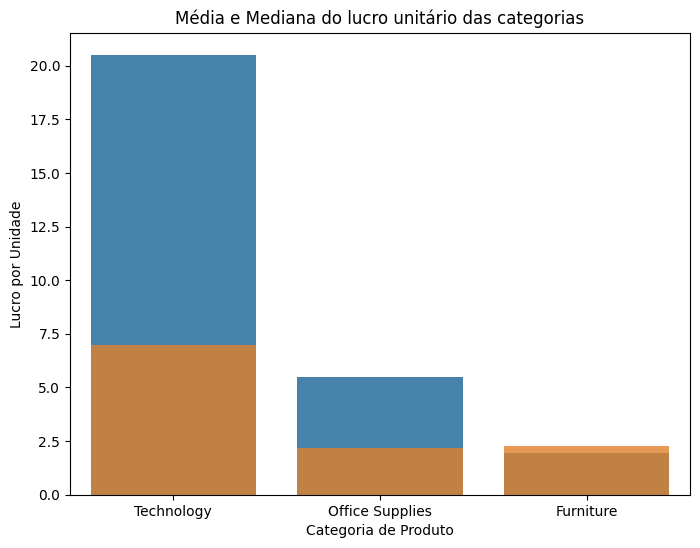

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data = media_lucro_unidade_cat, label='Média do Lucro', alpha=0.9)
sns.barplot(data = mediana_lucro_unidade_cat, label='Mediana do Lucro', alpha=0.8)
#não consegui colocar o legenda
#media do furniture é mto proxima da mediana
plt.title('Média e Mediana do lucro unitário das categorias')
plt.xlabel('Categoria de Produto')
plt.ylabel('Lucro por Unidade')
plt.show()

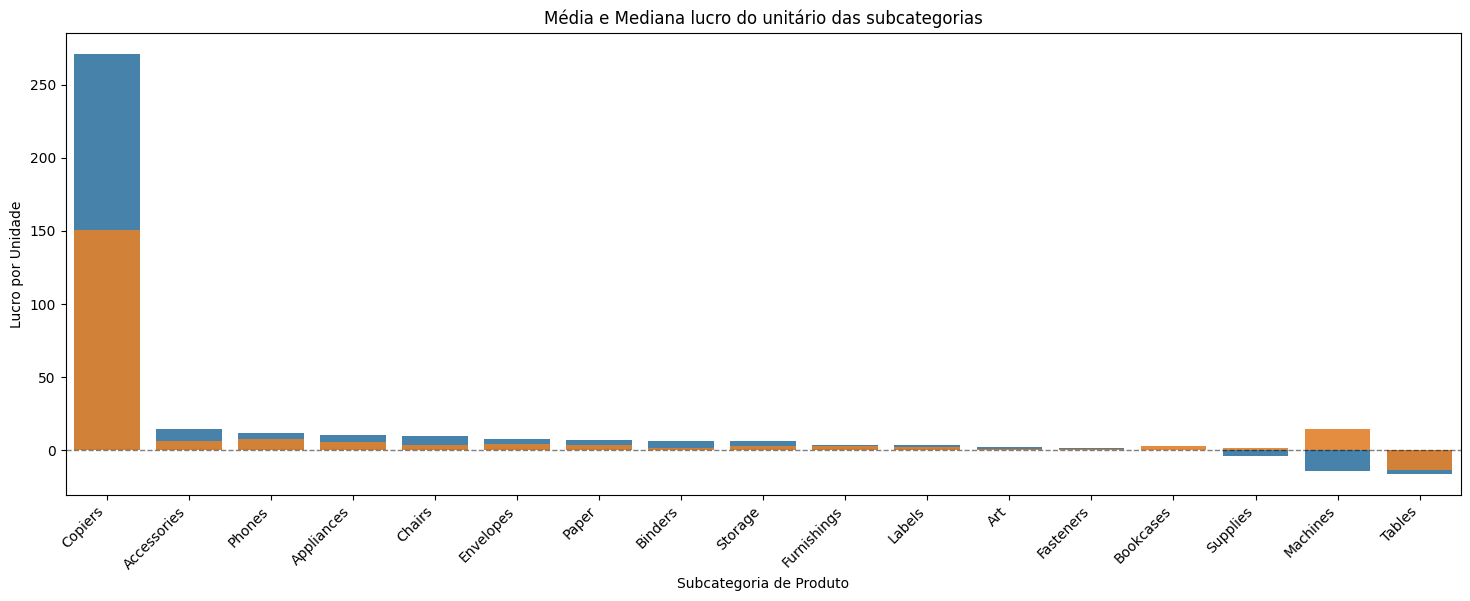

In [ ]:
plt.figure(figsize=(18, 6))
sns.barplot(data = media_lucro_unidade_sub, alpha=0.9)
sns.barplot(data = mediana_lucro_unidade_sub, alpha=0.9)
plt.xticks(rotation=45, horizontalalignment = 'right')
plt.title('Média e Mediana lucro do unitário das subcategorias')
plt.xlabel('Subcategoria de Produto')
plt.ylabel('Lucro por Unidade')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.5)
plt.show()



---

# **Conclusão dos lucros por produto**

**TECONOLOGIA**
*   É a categória com menos vendas. Entretanto, são os produtos que geram um maior faturamento entre as categórias.

*   Pelos graficos, vemos que as maquinas são as únicas dessa categoria que geram prejuizo para empresa. Sendo elas, pouco vendidas e gerando um saldo negativo.

*  As copiadoras são a subcategoria que geram o maior faturamento da empresa e são as que possuem um alto lucro médio por unidade vendida. Dessa forma, mesmo com poucas unidades vendidas, elas são os produtos que geram o maior impacto no lucro da empresa.

* Produtos como acessórios e celulares também geram um grande faturamento, ocupando o 2° e 3° lugar respectivamente, possuindo grande quantidades de vendas.

**MATÉRIAL DE ESCITÓRIO**


*   É a categoia que possui o maior número de vendas absolutas, sendo ela a categoria que representa mais de 50% das vendas.
*   Os destaques dela são os papéis e os fichários/pasta, representando uma grande quantidade de vendas, e um lucro absoluto alto, sendo elas matériais relativamente baratos.
*   Os suprimentos/matérias são os únicos que geram prejuizo e os fixadores quase não geram faturamento.

**Móbilia**



*   É a categoria que menos gera faturamento dentro da empresa, não representando nem 10% do lucro total da empresa.
*   Em destaque negativo as mesas que são os produtos com o maior prejuizo.
*   Cadeiras geram o maior lucro entre as mobilias, e os móveis("furnishings") logo em seguida.
*   Ja as estantes de livro, quase não geram algum faturamento.


---




# **Lucro por região ou por modo de pagamento**


In [ ]:
lucro_tot_pagamento = df.groupby('MODO_PAGAMENTO')['LUCRO'].sum().reset_index() #soma do lucro total
lucro_tot_regiao = df.groupby('REGIAO')['LUCRO'].sum().reset_index()
lucro_tot_pag_reg = df.groupby(['MODO_PAGAMENTO', 'REGIAO'])['LUCRO'].sum().reset_index()

In [ ]:
dfconsumer_quantidade = consumerdf['CATEGORIA_PRODUTO'].value_counts().reset_index()
dfconsumer_quantidade.columns = ['CATEGORIA_PRODUTO','Quantidade']
dfconsumer_quantidade.style.background_gradient(cmap='Oranges', high=1, low=0.6, subset=['Quantidade'])

,CATEGORIA_PRODUTO,Quantidade
0,Office Supplies,1804
1,Furniture,636
2,Technology,508


In [ ]:
dfregiao_quantidade = df['REGIAO'].value_counts().reset_index()
dfregiao_quantidade.columns = ['REGIÃO', 'Quantidade']
dfregiao_quantidade.style.background_gradient(cmap='Purples', high=0.2, low=0.6, subset=['Quantidade'])

,REGIÃO,Quantidade
0,West,1872
1,East,1656
2,Central,1363
3,South,910


In [ ]:
dfpag_quantidade = df['MODO_PAGAMENTO'].value_counts().reset_index()
dfpag_quantidade.columns = ['MODO DE PAGAMENTO', 'Quantidade']
dfpag_quantidade.style.background_gradient(cmap='Purples', high=0.3, low=0.6, subset=['Quantidade'])

,MODO DE PAGAMENTO,Quantidade
0,COD,2418
1,Online,2125
2,Cards,1258


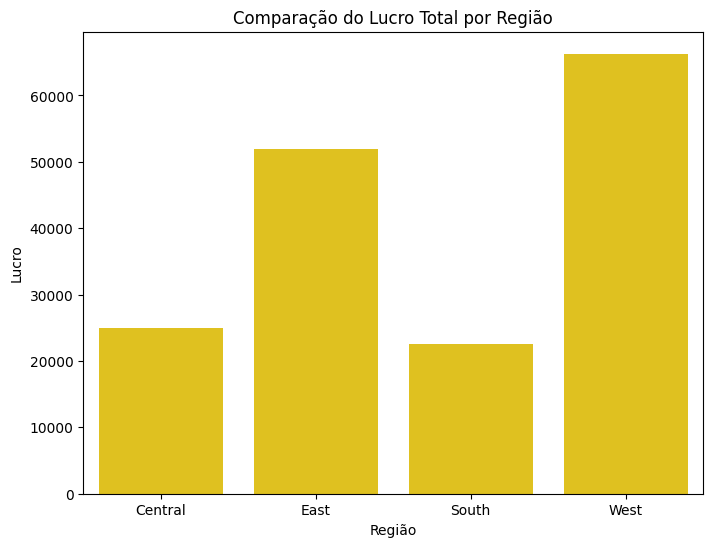

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data = lucro_tot_regiao, x= 'REGIAO', y = 'LUCRO', color = 'gold')
plt.xlabel('Região')
plt.ylabel('Lucro')
plt.title('Comparação do Lucro Total por Região')
plt.show()

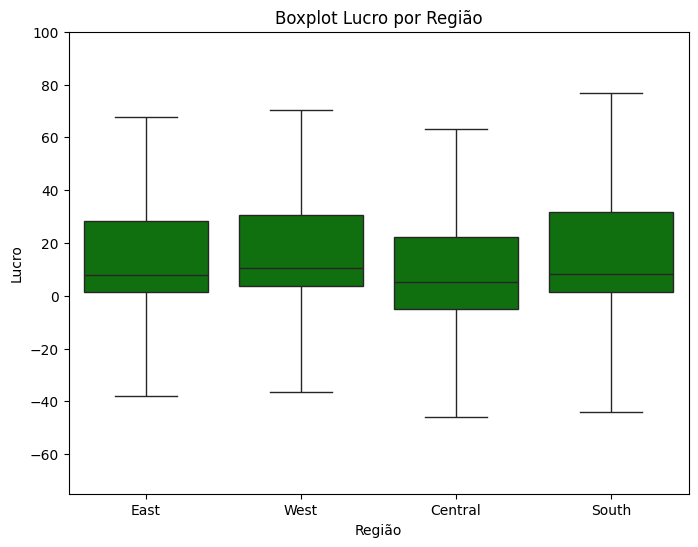

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, x= 'REGIAO', y = 'LUCRO', color ='green', showfliers=False)
plt.ylim(-75, 100) #limitei o espaço para uma melhor vizualisação
plt.xlabel('Região')
plt.ylabel('Lucro')
plt.title('Boxplot Lucro por Região')
plt.show()

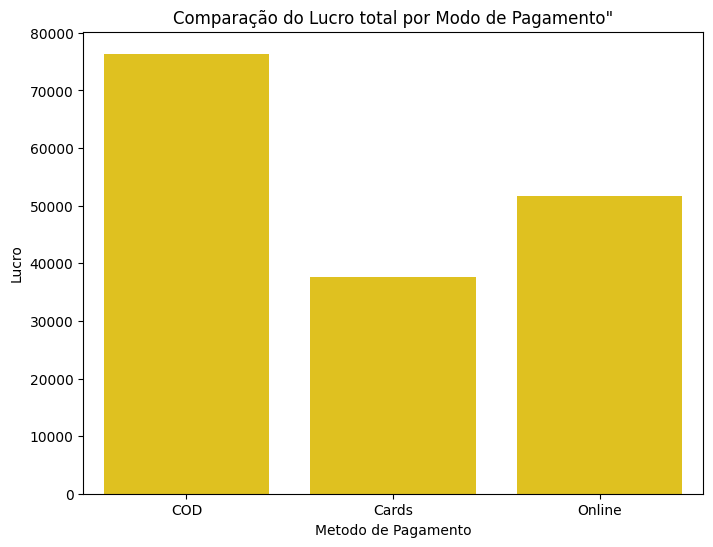

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data = lucro_tot_pagamento, x= 'MODO_PAGAMENTO', y = 'LUCRO', color = 'gold')
plt.xlabel('Metodo de Pagamento')
plt.ylabel('Lucro')
plt.title('Comparação do Lucro total por Modo de Pagamento"')
plt.show()

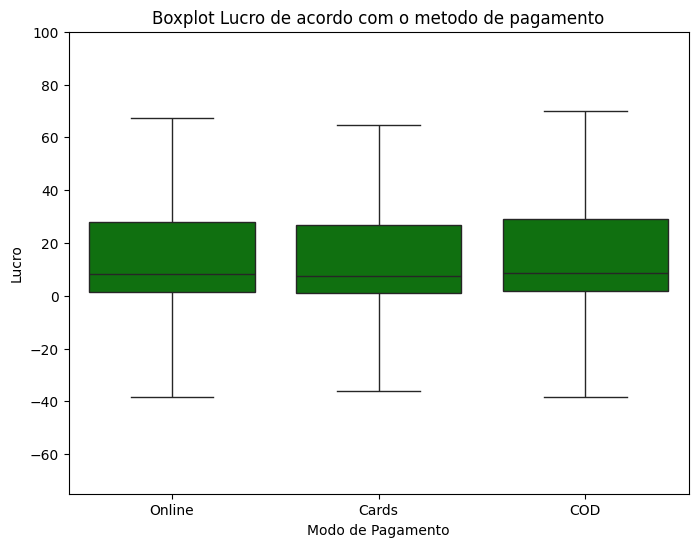

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, x= 'MODO_PAGAMENTO', y = 'LUCRO', color ='green', showfliers=False)
plt.ylim(-75, 100)
plt.xlabel('Modo de Pagamento')
plt.ylabel('Lucro')
plt.title('Boxplot Lucro de acordo com o metodo de pagamento')
plt.show()

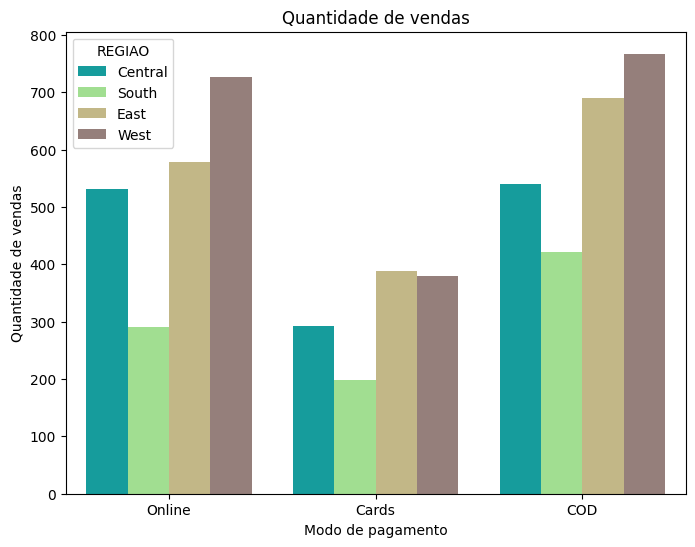

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x= 'MODO_PAGAMENTO', hue = 'REGIAO',hue_order=['Central', 'South', 'East', 'West'], palette = 'terrain')
plt.title("Quantidade de vendas")
plt.xlabel("Modo de pagamento")
plt.ylabel("Quantidade de vendas")
plt.show()

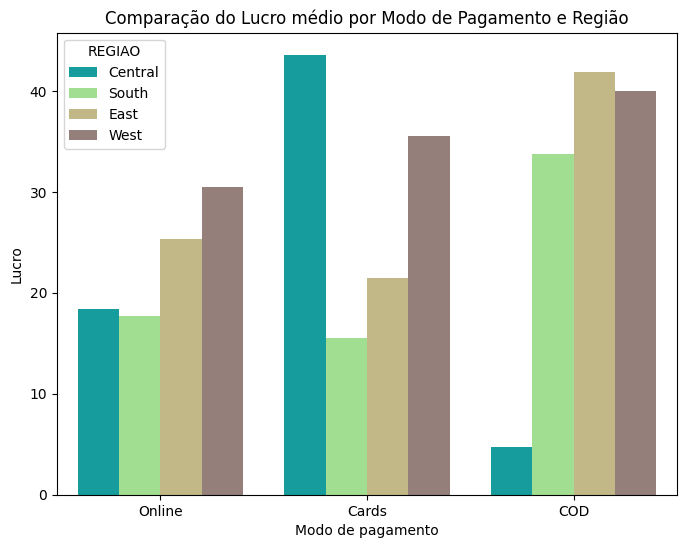

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='MODO_PAGAMENTO', y='LUCRO', hue='REGIAO', ci=None, palette='terrain', hue_order=['Central', 'South', 'East', 'West'])
plt.xlabel('Modo de pagamento')
plt.ylabel('Lucro')
plt.title('Comparação do Lucro médio por Modo de Pagamento e Região')
plt.show()



---


# **Analise de lucro baseado na região e forma de pagamento**

*   A região Oeste apresenta o maior valor absoluto de lucro, seguida pela região Leste.
*   O método de pagamento COD é responsável pelo maior lucro total.
*   O lucro médio do método COD é elevado, exceto na região Central, onde é significativamente inferior, indicando um possível problema.representar algum problema.
*   Por outro lado, a região Central apresenta um alto lucro no método de pagamento com cartão.
*   Apesar de estar ligeiramente atrás da região Leste em termos de vendas, a região Central possui metade do lucro total da Leste.
*   Por fim, o método de compra online tem uma participação significativa, mas seus lucros médios na região com mais vendas são baixos em comparação com outros métodos, o que impacta seu lucro absoluto.


---






#**Analisar a eficácia das entregas e pagamentos: A forma de entrega ou o método de pagamento o número de devoluções?**

In [ ]:
df['DEVOLUCAO'].value_counts()

,count
DEVOLUCAO,
No,5519
Yes,282


In [ ]:
porcentagens = df['DEVOLUCAO'].value_counts(normalize=True) * 100
print(porcentagens)

DEVOLUCAO
No     95.138769
Yes     4.861231
Name: proportion, dtype: float64


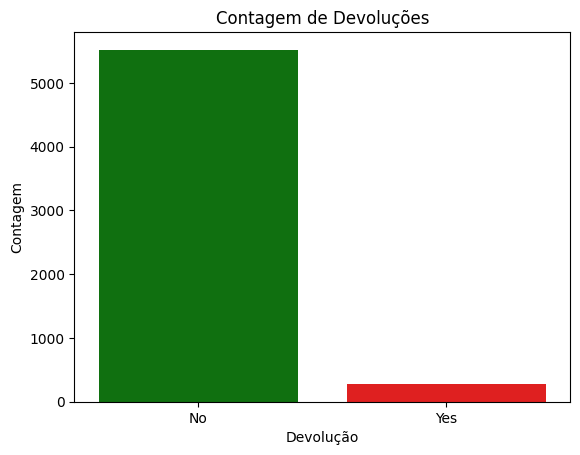

In [ ]:
cores = {'Yes': 'red', 'No': 'green'}

sns.countplot(data=df, x='DEVOLUCAO', palette=cores)

plt.title('Contagem de Devoluções')
plt.xlabel('Devolução')
plt.ylabel('Contagem')

plt.show()

In [ ]:
df['FORMA_ENTREGA'].value_counts()

,count
FORMA_ENTREGA,
Standard Class,3397
Second Class,1123
First Class,943
Same Day,338


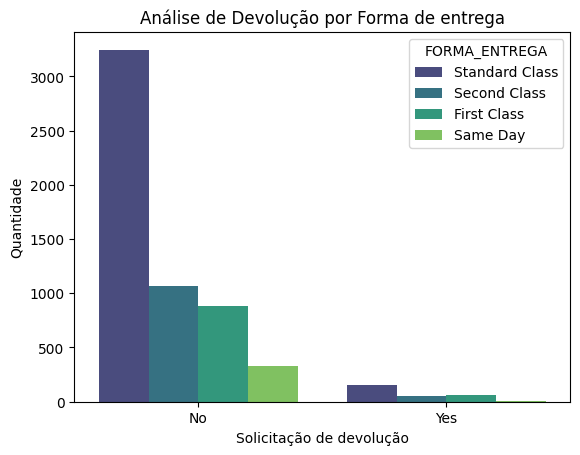

In [ ]:
sns.countplot(data=df, x='DEVOLUCAO', hue='FORMA_ENTREGA', hue_order=['Standard Class', 'Second Class', 'First Class', 'Same Day'], palette = 'viridis')
plt.title('Análise de Devolução por Forma de entrega')
plt.xlabel('Solicitação de devolução')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
df['MODO_PAGAMENTO'].value_counts()

,count
MODO_PAGAMENTO,
COD,2418
Online,2125
Cards,1258


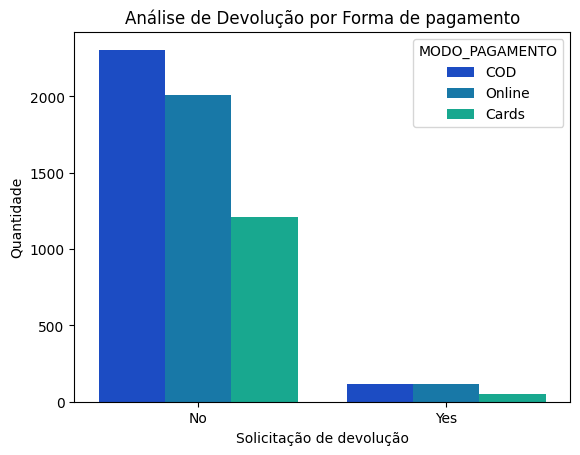

In [ ]:
sns.countplot(data=df, x='DEVOLUCAO', hue='MODO_PAGAMENTO', hue_order=['COD', 'Online', 'Cards'], palette ='winter')
plt.title('Análise de Devolução por Forma de pagamento')
plt.xlabel('Solicitação de devolução')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
devolucao = df.query('DEVOLUCAO == "Yes"')

In [ ]:
devolucao['FORMA_ENTREGA'].value_counts()

,count
FORMA_ENTREGA,
Standard Class,152
First Class,64
Second Class,56
Same Day,10


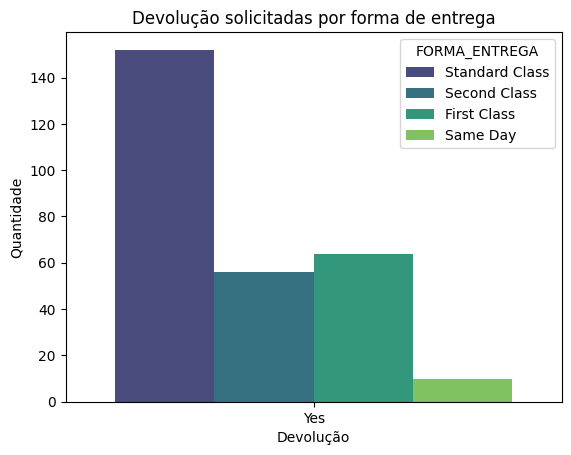

In [ ]:
sns.countplot(data=devolucao, x='DEVOLUCAO', hue='FORMA_ENTREGA', hue_order=['Standard Class', 'Second Class', 'First Class', 'Same Day'], palette = 'viridis')
plt.title('Devolução solicitadas por forma de entrega')
plt.xlabel('Devolução')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
devolucao['MODO_PAGAMENTO'].value_counts()

,count
MODO_PAGAMENTO,
Online,119
COD,113
Cards,50


In [ ]:
porcentagens = devolucao['MODO_PAGAMENTO'].value_counts(normalize=True) * 100
print(porcentagens)

MODO_PAGAMENTO
Online    42.198582
COD       40.070922
Cards     17.730496
Name: proportion, dtype: float64


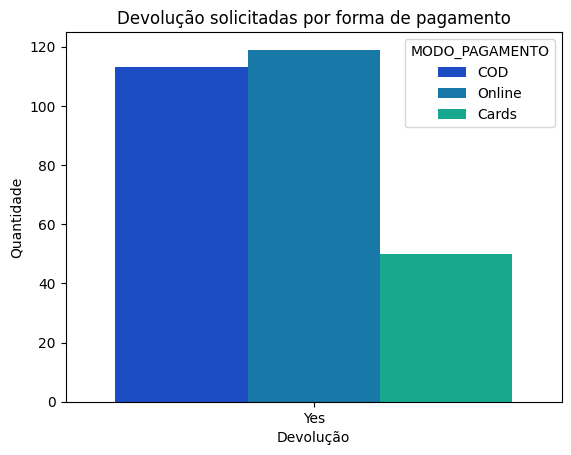

In [ ]:
sns.countplot(data=devolucao, x='DEVOLUCAO', hue='MODO_PAGAMENTO', hue_order=['COD', 'Online', 'Cards'], palette ='winter')
plt.title('Devolução solicitadas por forma de pagamento')
plt.xlabel('Devolução')
plt.ylabel('Quantidade')
plt.show()

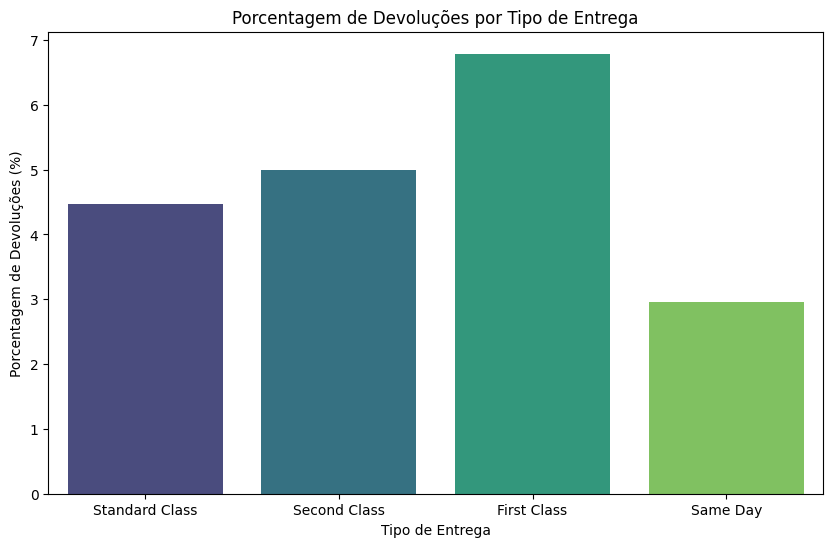

In [ ]:
contagem_entrega = df.groupby(['FORMA_ENTREGA', 'DEVOLUCAO']).size().unstack() #size retornará o número total de ocorrências para cada método de pagamento no
#unstack transformar um nível do índice de linhas em colunas
porcentagem_entrega_devolucao = (contagem_entrega['Yes'] / contagem_entrega.sum(axis=1)) * 100
# Cria um gráfico de barras para a porcentagem de devoluções por tipo de entrega
plt.figure(figsize=(10, 6))
sns.barplot(x=porcentagem_entrega_devolucao.index, y=porcentagem_entrega_devolucao.values, palette = 'viridis', order=['Standard Class', 'Second Class', 'First Class', 'Same Day'])
plt.xlabel('Tipo de Entrega')
plt.ylabel('Porcentagem de Devoluções (%)')
plt.title('Porcentagem de Devoluções por Tipo de Entrega')
plt.show()

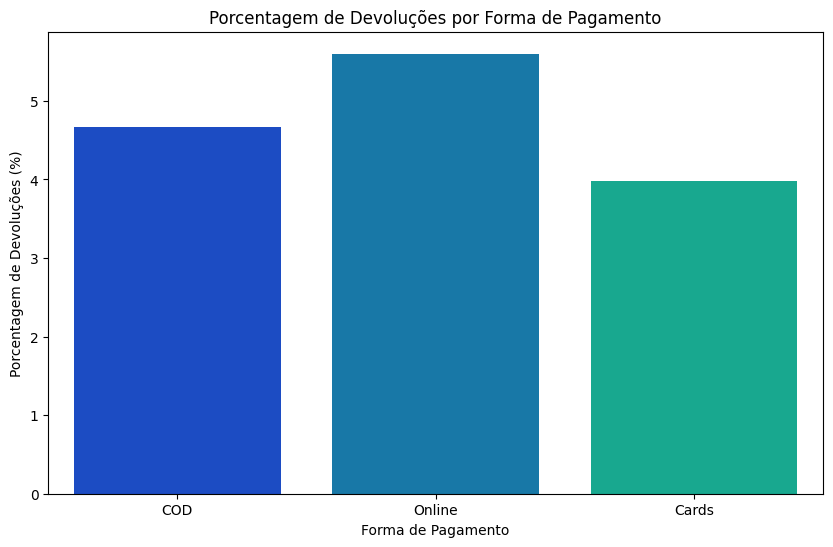

In [ ]:
contagem_pag = df.groupby(['MODO_PAGAMENTO', 'DEVOLUCAO']).size().unstack() #size retornará o número total de ocorrências para cada método de pagamento no
#unstack transformar um nível do índice de linhas em colunas
porcentagem_pag_devolucao = (contagem_pag['Yes'] / contagem_pag.sum(axis=1)) * 100
# Cria um gráfico de barras para a porcentagem de devoluções por tipo de entrega
plt.figure(figsize=(10, 6))
sns.barplot(x=porcentagem_pag_devolucao.index, y=porcentagem_pag_devolucao.values, palette = 'winter', order=['COD', 'Online', 'Cards'])
plt.xlabel('Forma de Pagamento')
plt.ylabel('Porcentagem de Devoluções (%)')
plt.title('Porcentagem de Devoluções por Forma de Pagamento')
plt.show()



---


## Analise das Devoluções


*   As devoluções totais somam aproximadamente 5% de todas as entregas
*   Nota-se que em quantidade o 'Standard Class' possui a maior quantidade de devolução, mas em questão de porcentagem ele é o penultimo em compração com outros métodos de entregas
*   Ja na forma de pagamento, o online é o predominante nas devoluções, mesmo não sendo a forma de compra mais predominante.
*   Por isso, a forma mais otimizada de analisar as devoluções, são em questão de porcentagem de devolução de acordo com a Forma de Pagamento e Entrega.

